In [1]:
#Import libraries, modules, functions. Added as I went through the pipline.
import seaborn as sns
import matplotlib.pyplot as plt
import prep
import preprocess
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats
from datetime import datetime
from env import get_connection
from sklearn.model_selection import train_test_split
from acquire import get_telco_data

## 1. Acquire

In [2]:
#from acquire import get_telco_data() to import telco and assign it to a variable.

df = get_telco_data()

df.head()

found data


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,signup_date,churn_month,payment_type,contract_type,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,2,65.6,593.3,No,2021-04-21 18:07:34,NaN,Mailed check,One year,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,2,59.9,542.4,No,2021-04-21 18:07:34,NaN,Mailed check,Month-to-month,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,1,73.9,280.85,Yes,2021-09-21 18:07:34,2022-01-31,Electronic check,Month-to-month,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,1,98.0,1237.85,Yes,2020-12-21 18:07:34,2022-01-31,Electronic check,Month-to-month,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,2,83.9,267.4,Yes,2021-10-21 18:07:34,2022-01-31,Mailed check,Month-to-month,Fiber optic


In [3]:
#making sure dimensions (rows, columns) are accurate
df.shape

(7043, 26)

## 2. Prep

In [4]:
#investigating features dtype to see if they make sense
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [5]:
#checking values for churn column.
df.churn.value_counts()


No     5174
Yes    1869
Name: churn, dtype: int64

In [6]:
#Finding columns with missing values and the total of missing values.

missing = df.isnull().sum()
missing[missing > 0]


churn_month    5174
dtype: int64

In [7]:
#Validate those missing values. 

df.isna().sum()


customer_id                    0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
tenure                         0
phone_service                  0
multiple_lines                 0
internet_service_type_id       0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
contract_type_id               0
paperless_billing              0
payment_type_id                0
monthly_charges                0
total_charges                  0
churn                          0
signup_date                    0
churn_month                 5174
payment_type                   0
contract_type                  0
internet_service_type          0
dtype: int64

## #That's alot of null values. I can either fill those null values or just drop the entire column. I will drop that column since I already have a column for tenure and churn.

## I will also drop signup date and all features that end with id since those dont have any significance. 

In [8]:
#calling function I made within prep module to drop columns
df = prep.drop_cols(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,One year,DSL
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Month-to-month,Fiber optic


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

## #Total charges is an object. It will be more effective as a float.

In [10]:
#calling a function that casts total charges dtype to float.
prep.change_dtype(df)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,Mailed check,One year,DSL
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Mailed check,Month-to-month,DSL
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Mailed check,Month-to-month,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,Mailed check,One year,DSL
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Electronic check,Month-to-month,Fiber optic
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Mailed check,Month-to-month,DSL
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Mailed check,Two year,DSL


In [11]:
#How I cast it to a float
df.total_charges = df.total_charges.replace(' ', 0)

In [12]:
#How I cast it to a float
df.total_charges = df.total_charges.astype(float)
df.total_charges.head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: total_charges, dtype: float64

## #I noticed churn contains yes/no values. It would be more effective to have values 1/0. I had to run next line of code during model phase.

In [13]:
#converted churn values to 1/0.
#df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})

In [14]:
#verify changes
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [15]:
#I was doing this before dropping the column.
#df.signup_date = (pd.to_datetime(df.signup_date)).dt.date

## - Split train, val, test.

In [16]:
#called function to split my data set (70%, 15%, 15%).
train, val, test = prep.train_val_test(df, 'churn')

In [17]:
#verify all columns match.
train.shape, val.shape, test.shape

((4930, 20), (1056, 20), (1057, 20))

## #I feel good with these changes.

## 3. Exploration

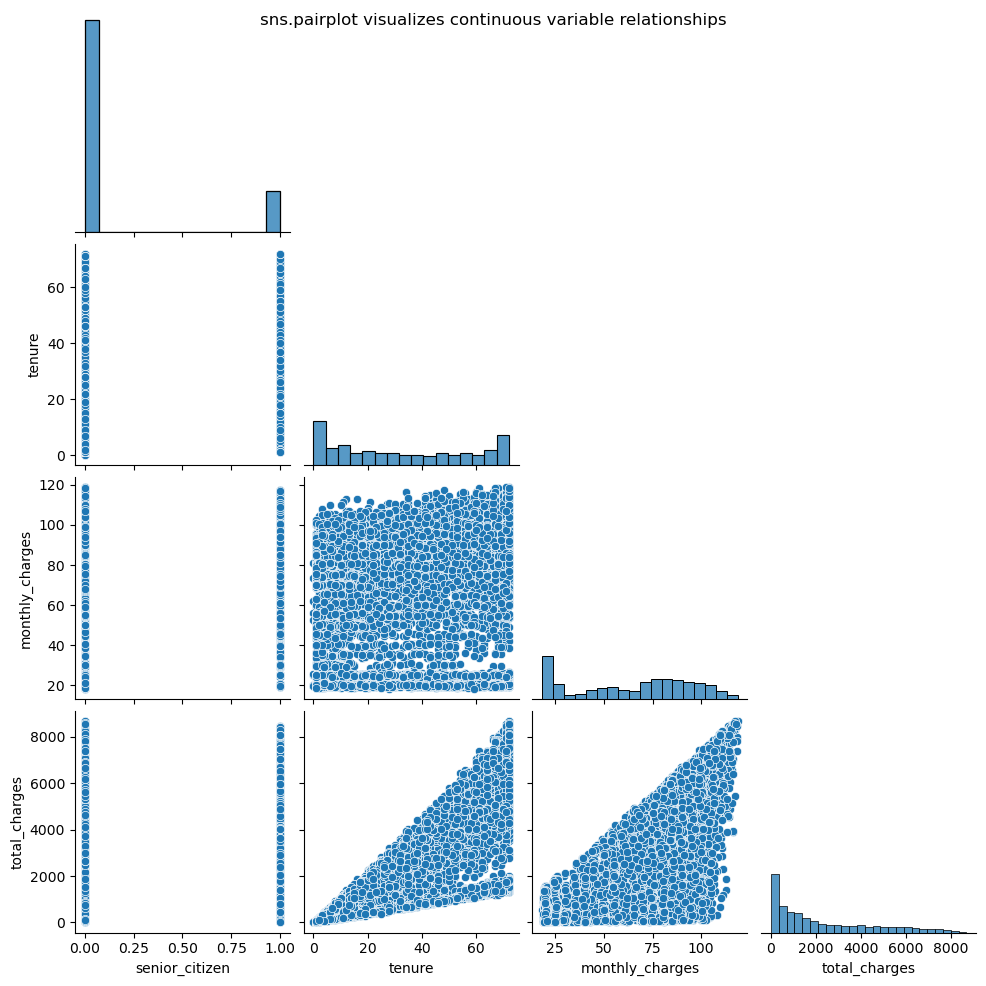

In [18]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()


## #This does not make sense to me.

## # I will run correlation tests on my train subset.

In [19]:
#assigned x,y to features I want to test.
x = train.total_charges
y = train.tenure

In [20]:
#function to run the pearsonr function.
def corr(x, y):

    corr, p = stats.pearsonr(x, y)
    
    return corr, p

In [21]:
#call function.
corr(x, y)

(0.82695490015571, 0.0)

In [22]:
#same function different features.
x = train.monthly_charges
y = train.tenure
corr(x, y)

(0.2552668654004236, 3.488717256687844e-74)

In [23]:
#same function different features.
#x = train.monthly_charges
#y = train.churn
#corr(x, y)

## #I need to review this lesson. Not sure if this is correct and confused what the values mean.

## - Visualize

In [24]:
#crosstab visual.
pd.crosstab(train.churn, train.phone_service)

phone_service,No,Yes
churn,,
No,331,3291
Yes,114,1194


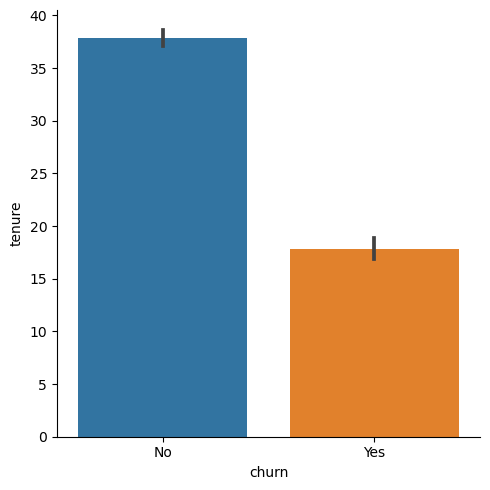

In [25]:
#catplot for numerical to categorical features.
sns.catplot(data = train, x = 'churn', y = 'tenure', kind = 'bar')

## #customers mostlikely to churn within about 17 months

<Axes: xlabel='gender', ylabel='count'>

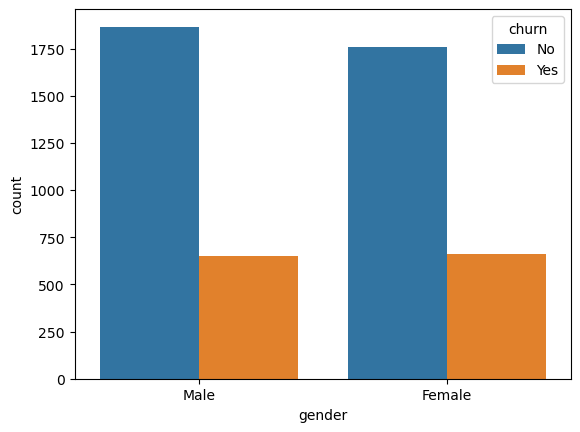

In [26]:
sns.countplot(data= train, x="gender", hue="churn")

In [27]:
train[:]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
5609,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Electronic check,Month-to-month,Fiber optic
2209,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.40,Yes,Mailed check,One year,DSL
6919,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.20,Yes,Electronic check,Month-to-month,Fiber optic
2284,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.50,No,Electronic check,Two year,DSL
845,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.70,Yes,Mailed check,Month-to-month,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Male,0,Yes,Yes,40,Yes,Yes,No,No,Yes,No,No,No,Yes,81.20,3292.30,No,Electronic check,Month-to-month,Fiber optic
1501,Male,0,Yes,Yes,52,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,24.55,1331.05,No,Mailed check,Two year,None
6331,Female,0,Yes,Yes,22,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.75,452.35,No,Bank transfer (automatic),One year,None
2739,Female,0,Yes,Yes,24,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,24.70,571.75,No,Mailed check,Two year,None


In [28]:
#can I create a functiom the calls all my columns and applies it to a countplot

def c_plot(df, target):
    
    df = df[:]
    
    for col in df:
    
        return sns.countplot(data= df, x= col , hue= target)

<Axes: xlabel='gender', ylabel='count'>

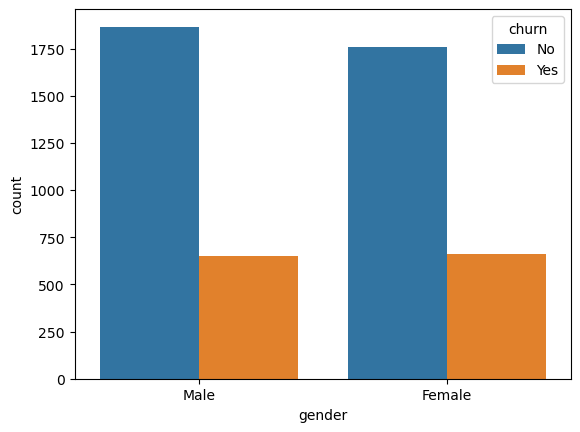

In [29]:
c_plot(train, 'churn' )

In [30]:
cross_tab = pd.crosstab(train['churn'], train['gender'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 1.425229713773847
P-value: 0.2325445321392852
Degrees of Freedom: 1
Expected Frequencies:
 [[1775.00040568 1846.99959432]
 [ 640.99959432  667.00040568]]
There is no significant association between the variables.


## #there is no significance between these two features.

## #since there is no significance I will drop the gender feature.

In [31]:
#how I dropped the column later in preprocessing.
#train = train.drop(columns = 'gender')

In [32]:
#how I dropped the column.
#val = val.drop(columns = 'gender')
#test = test.drop(columns = 'gender')

In [33]:
cross_tab = pd.crosstab(train['churn'], train['dependents'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 127.52149549413217
P-value: 1.4284535276057882e-29
Degrees of Freedom: 1
Expected Frequencies:
 [[2524.37971602 1097.62028398]
 [ 911.62028398  396.37971602]]
There is a significant association between the variables.


<Axes: xlabel='dependents', ylabel='count'>

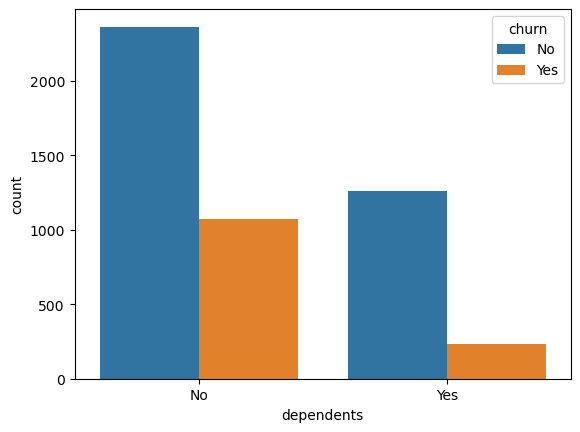

In [34]:
sns.countplot(data = train, x = "dependents", hue = "churn")

## #those without dependents more likely to churn.

In [35]:
cross_tab = pd.crosstab(train['churn'], train['senior_citizen'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 111.21233236449862
P-value: 5.316079702345653e-26
Degrees of Freedom: 1
Expected Frequencies:
 [[3039.39432049  582.60567951]
 [1097.60567951  210.39432049]]
There is a significant association between the variables.


<Axes: xlabel='senior_citizen', ylabel='count'>

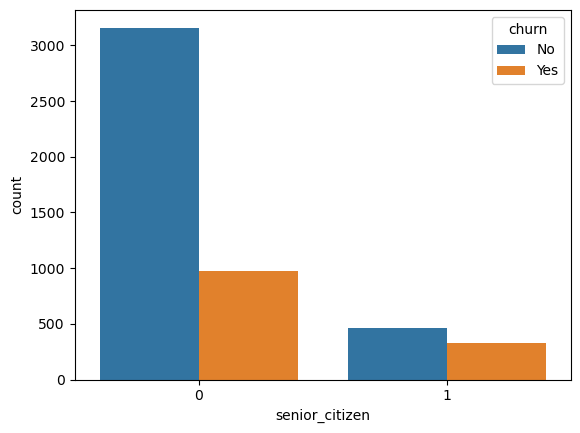

In [36]:
sns.countplot(data= train, x="senior_citizen", hue="churn")

## #not sure of this association but seems like non senior citizens more likely to churn.

In [37]:
train.streaming_movies.value_counts()

No                     1943
Yes                    1924
No internet service    1063
Name: streaming_movies, dtype: int64

In [38]:
train.streaming_tv.value_counts()

No                     1964
Yes                    1903
No internet service    1063
Name: streaming_tv, dtype: int64

In [39]:
train.internet_service_type.value_counts()

Fiber optic    2199
DSL            1668
None           1063
Name: internet_service_type, dtype: int64

In [40]:
train[train.streaming_movies != 'No internet service']


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
5609,Male,0,No,No,14,Yes,No,No,No,Yes,No,No,No,No,76.45,1117.55,No,Electronic check,Month-to-month,Fiber optic
2209,Male,0,No,No,5,Yes,No,No,No,Yes,No,Yes,Yes,Yes,70.00,347.40,Yes,Mailed check,One year,DSL
6919,Male,0,Yes,No,35,Yes,Yes,No,No,No,No,No,No,Yes,75.20,2576.20,Yes,Electronic check,Month-to-month,Fiber optic
2284,Male,0,Yes,No,58,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,86.10,4890.50,No,Electronic check,Two year,DSL
845,Female,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,49.60,114.70,Yes,Mailed check,Month-to-month,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,Female,0,Yes,Yes,30,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,80.80,2369.30,No,Bank transfer (automatic),Two year,DSL
1289,Male,0,Yes,Yes,7,Yes,No,No,No,No,No,No,No,No,44.75,333.65,No,Electronic check,Month-to-month,DSL
5261,Male,0,Yes,No,18,Yes,No,No,No,Yes,No,No,No,Yes,49.55,878.35,Yes,Mailed check,Month-to-month,DSL
3200,Female,0,Yes,Yes,4,Yes,No,No,No,Yes,No,No,No,Yes,73.75,325.45,Yes,Electronic check,Month-to-month,Fiber optic


## #I noticed that many of these features include same value of no internet service. So I am thinking of dropping those values since there is already a feature for internet service type.

In [41]:
cross_tab = pd.crosstab(train['churn'], train['payment_type'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 467.1218774885944
P-value: 6.35850529852611e-101
Degrees of Freedom: 3
Expected Frequencies:
 [[ 808.88884381  789.05233266 1204.88438134  819.17444219]
 [ 292.11115619  284.94766734  435.11561866  295.82555781]]
There is a significant association between the variables.


<Axes: xlabel='payment_type', ylabel='count'>

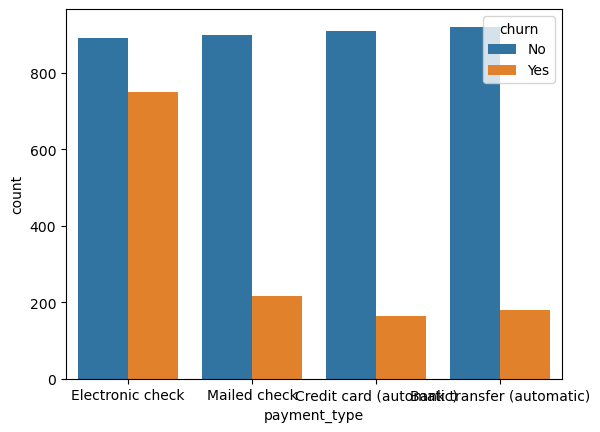

In [42]:
sns.countplot(data= train, x="payment_type", hue="churn")

## #seems like manual users more likely to churn.

In [43]:
cross_tab = pd.crosstab(train['churn'], train['phone_service'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 0.16104933590843382
P-value: 0.6881922507463794
Degrees of Freedom: 1
Expected Frequencies:
 [[ 326.93509128 3295.06490872]
 [ 118.06490872 1189.93509128]]
There is no significant association between the variables.


<Axes: xlabel='phone_service', ylabel='count'>

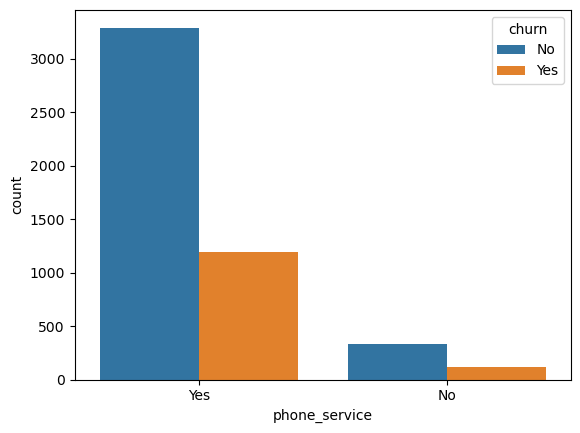

In [44]:
sns.countplot(data= train, x="phone_service", hue="churn")

## #I do not see the significance in phone service. I will drop this feature.

In [45]:
cross_tab = pd.crosstab(train['churn'], train['partner'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 108.4523023784194
P-value: 2.1393721043592164e-25
Degrees of Freedom: 1
Expected Frequencies:
 [[1880.79513185 1741.20486815]
 [ 679.20486815  628.79513185]]
There is a significant association between the variables.


<Axes: xlabel='partner', ylabel='count'>

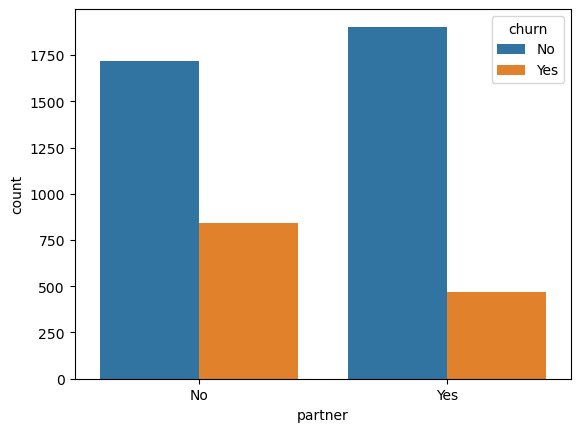

In [46]:
sns.countplot(data= train, x="partner", hue="churn")

## #more to churn without partner.

In [47]:
cross_tab = pd.crosstab(train['churn'], train['tech_support'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 586.3664617780223
P-value: 4.700462998703674e-128
Degrees of Freedom: 2
Expected Frequencies:
 [[1783.08194726  780.97079108 1057.94726166]
 [ 643.91805274  282.02920892  382.05273834]]
There is a significant association between the variables.


<Axes: xlabel='tech_support', ylabel='count'>

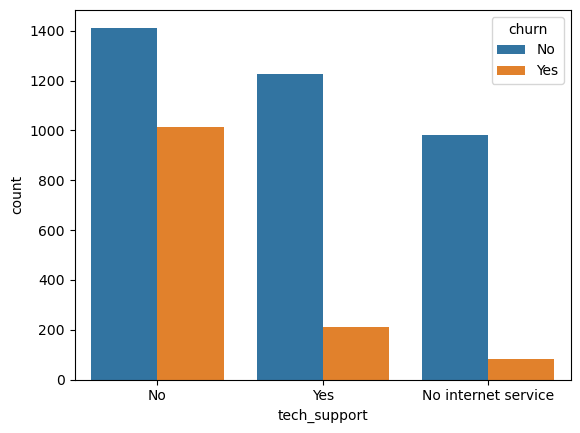

In [48]:
sns.countplot(data= train, x="tech_support", hue="churn")

## #more likely to churn without tech support.

In [49]:
cross_tab = pd.crosstab(train['churn'], train['internet_service_type'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 490.0399007333384
P-value: 3.883180691626175e-107
Degrees of Freedom: 2
Expected Frequencies:
 [[1225.45557809 1615.57363083  780.97079108]
 [ 442.54442191  583.42636917  282.02920892]]
There is a significant association between the variables.


<Axes: xlabel='internet_service_type', ylabel='count'>

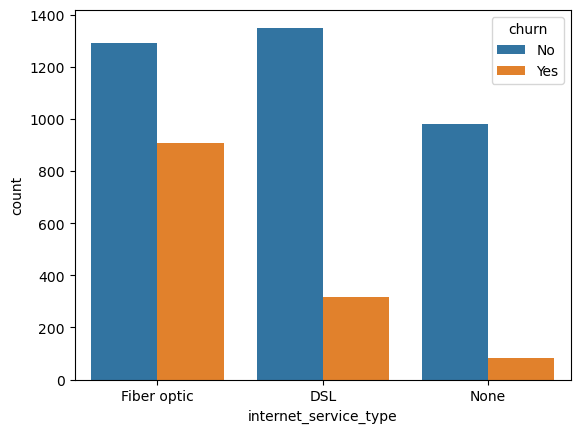

In [50]:
sns.countplot(data= train, x="internet_service_type", hue="churn")

## #fiber optic users more likely to churn.

In [51]:
cross_tab = pd.crosstab(train['churn'], train['streaming_tv'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 254.372354574066
P-value: 5.8042355636700185e-56
Degrees of Freedom: 2
Expected Frequencies:
 [[1442.92251521  780.97079108 1398.10669371]
 [ 521.07748479  282.02920892  504.89330629]]
There is a significant association between the variables.


<Axes: xlabel='streaming_tv', ylabel='count'>

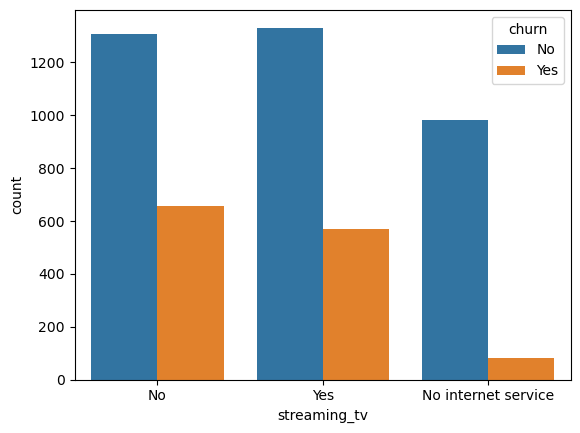

In [52]:
sns.countplot(data= train, x="streaming_tv", hue="churn")

## #I dont see the significance between yes and no. I think the no internet service value is noise.

In [53]:
cross_tab = pd.crosstab(train['churn'], train['multiple_lines'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 5.564920974218287
P-value: 0.06188605006622484
Degrees of Freedom: 2
Expected Frequencies:
 [[1761.04137931  326.93509128 1534.02352941]
 [ 635.95862069  118.06490872  553.97647059]]
There is no significant association between the variables.


<Axes: xlabel='multiple_lines', ylabel='count'>

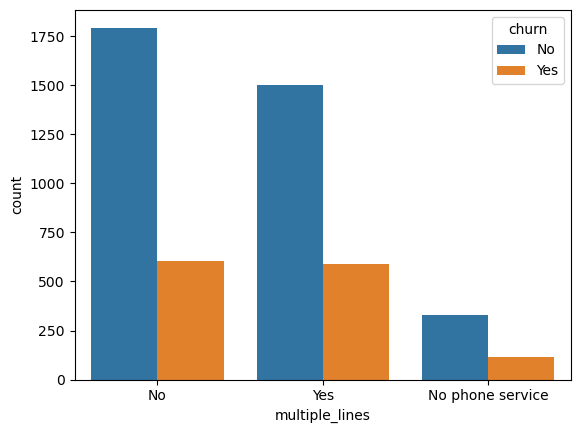

In [54]:
sns.countplot(data= train, x="multiple_lines", hue="churn")

## #I do not see the significance in this feature.

In [55]:
cross_tab = pd.crosstab(train['churn'], train['contract_type'])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_val < 0.05:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Statistic: 857.5521456703501
P-value: 6.094212526763626e-187
Degrees of Freedom: 2
Expected Frequencies:
 [[1978.50831643  769.2158215   874.27586207]
 [ 714.49168357  277.7841785   315.72413793]]
There is a significant association between the variables.


<Axes: xlabel='contract_type', ylabel='count'>

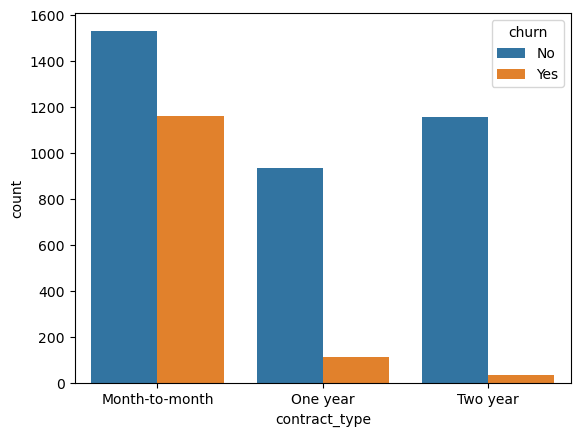

In [56]:
sns.countplot(data= train, x="contract_type", hue="churn")

## #month to month more likely to churn.

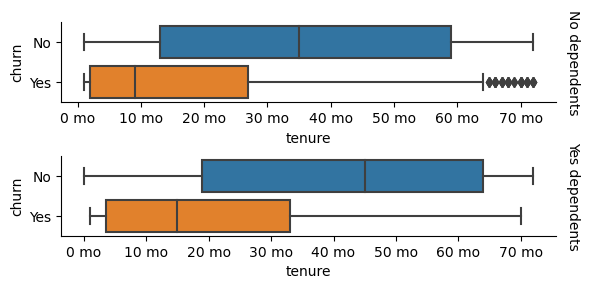

In [57]:
g = sns.catplot(
    data= train,
    x="tenure", y="churn", row="dependents",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="tenure", ylabel="churn")
g.set_titles(row_template="{row_name} dependents")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('{x:.0f} mo')

## trying to build a function

In [58]:
# an array of all observed values of the subgroup
def ones_onet(df, col, order_by):
    
    sample = df[col == 'Yes'].order_by

# the population mean
    overall_mean = order_by.mean()

    t, p = stats.ttest_1samp(sample, overall_mean)

    print(t, p/2)

In [59]:
#col = train.churn
#order_by = monthly_charges
#ones_onet(train, col, order_by)

## one sample, one tailed, ttest (significantly higher)

In [60]:
(train.monthly_charges).mean()

65.1107505070994

In [61]:
a = .05

churn_sample = train[train.churn == 'Yes'].monthly_charges

overall_mean = (train.monthly_charges).mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2)

a =.05

if p/2 > a:
    
    print("We fail to reject the null hypothesis.")

elif t < 0:
    
    print("We fail to reject null hypothesis.")

else:
    
    print("We reject the null hypothesis.")


13.626159134989743 6.213304671023248e-40
We reject the null hypothesis.


## #the mean monthly charges of customers churn is significantly higher than the population monthly charge average.

# one sample, 2 tailed ttest (significantly diff)

In [62]:
churn_sample = train[train.churn == 'Yes'].monthly_charges

overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p)

a = .05

if p < a:
    
    print(f'the result is significant we reject the null hypothesis with a p_value of {round(p, 2)}.')
    
else:
        
    print(f'we fail to reject the null hypothesis with a p_value of {round(p, 2)}.')



13.626159134989743 1.2426609342046496e-39
the result is significant we reject the null hypothesis with a p_value of 0.0.


## #tells me the difference but not why

## 2 sample, 1 tailed ttest (significantly higher)

In [63]:
churn_sample = train[train.churn == 'Yes'].monthly_charges
no_churn_sample = train[train.churn == 'No'].monthly_charges

print(churn_sample.var())
print(no_churn_sample.var())

604.1593850976509
976.0788840878639


## why is variance important.

In [64]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
print('t =',t)
print('p =',p)

a = .05

print("is p/2 < alpha? ", p / 2 < a)
print("is t > 0? ", t > 0)

if p / 2 > a:
    
    print("We fail to reject the null hypothesis")
    
elif t < 0:
    
    print("We fail to reject the null hypothesis")
    
else:
    
    print("We reject the null hypothesis")


t = 14.73912733835214
p = 1.7651698418991305e-47
is p/2 < alpha?  True
is t > 0?  True
We reject the null hypothesis


## #average churn sample monthly charge is significantly higher than average monthly charge of active users.

## 2 sample, 2 tailed ttest (significantly diff)

In [65]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
print('t =',t)
print('p =',p)

a = .05

if p < a:
    
    print(f'the result is significant we reject the null hypothesis with a p_value of {round(p, 2)}.')
    
else:
        
    print(f'we fail to reject the null hypothesis with a p_value of {round(p, 2)}.')


t = 14.73912733835214
p = 1.7651698418991305e-47
the result is significant we reject the null hypothesis with a p_value of 0.0.


## #there is a significant difference between both samples.

In [66]:
train.total_charges.head()

5609    1117.55
2209     347.40
6919    2576.20
2284    4890.50
845      114.70
Name: total_charges, dtype: float64

In [67]:
churn_sample = train[train.churn == 'Yes'].total_charges
no_churn_sample = train[train.churn == 'No'].total_charges

print(churn_sample.var())
print(no_churn_sample.var())

3554216.9086103593
5522608.211020269


In [68]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)
print('t =',t)
print('p =',p)

a = .05

print("is p/2 < alpha? ", p / 2 < a)
print("is t > 0? ", t > 0)

if p / 2 > a:
    
    print("We fail to reject the null hypothesis")
    
elif t < 0:
    
    print("We fail to reject the null hypothesis")
    
else:
    
    print("We reject the null hypothesis")


t = -16.402958895829094
p = 7.359457658881962e-58
is p/2 < alpha?  True
is t > 0?  False
We fail to reject the null hypothesis


## #THIS DOES NOT MAKE SENSE!!!

In [69]:
#Checking for null values.
train.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
payment_type             0
contract_type            0
internet_service_type    0
dtype: int64

In [70]:
#checking for null values.
val.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
payment_type             0
contract_type            0
internet_service_type    0
dtype: int64

In [71]:
#checking for null values.
test.isna().sum()

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
payment_type             0
contract_type            0
internet_service_type    0
dtype: int64

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4930 non-null   object 
 1   senior_citizen         4930 non-null   int64  
 2   partner                4930 non-null   object 
 3   dependents             4930 non-null   object 
 4   tenure                 4930 non-null   int64  
 5   phone_service          4930 non-null   object 
 6   multiple_lines         4930 non-null   object 
 7   online_security        4930 non-null   object 
 8   online_backup          4930 non-null   object 
 9   device_protection      4930 non-null   object 
 10  tech_support           4930 non-null   object 
 11  streaming_tv           4930 non-null   object 
 12  streaming_movies       4930 non-null   object 
 13  paperless_billing      4930 non-null   object 
 14  monthly_charges        4930 non-null   float64
 15  t

In [73]:
#dropping columns I found insignificant
train = preprocess.drop_insign(train)
val = preprocess.drop_insign(val)

In [74]:
#converted churn values to 1/0.
train['churn'] = train['churn'].map({'Yes': 1, 'No': 0})

In [75]:
#converted churn values to 1/0.
val['churn'] = val['churn'].map({'Yes': 1, 'No': 0})

## Modeling

In [76]:
#X,y split test and get dummies
X_train = train.drop(columns = 'churn')
y_train = train.churn

X_train = pd.get_dummies(X_train)
X_train = X_train.drop(columns = ['online_security_No internet service', 'online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service'])
X_train.head()

KeyError: "['streaming_movies_No internet service'] not found in axis"

In [77]:
##X,y split val and get dummies
X_val = val.drop(columns = 'churn')
y_val = val.churn

X_val = pd.get_dummies(X_val)
X_val = X_val.drop(columns = ['online_security_No internet service', 'online_backup_No internet service', 'device_protection_No internet service', 'tech_support_No internet service', 'streaming_tv_No internet service', 'streaming_movies_No internet service'])
X_val.head()

KeyError: "['streaming_movies_No internet service'] not found in axis"

## Baseline

In [78]:
#making sure dtype is integer.
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 4930 entries, 5609 to 5679
Series name: churn
Non-Null Count  Dtype
--------------  -----
4930 non-null   int64
dtypes: int64(1)
memory usage: 77.0 KB


In [79]:
#found the mode for values.
y_train.mode()

0    0
Name: churn, dtype: int64

In [80]:
#since mode is 0 I will find the mean of all those values for a baseline
print(f'Baseline = {(y_train == 0).mean()}')

Baseline = 0.734685598377282


In [81]:
#create a random forest model
rf = RandomForestClassifier(
                            max_depth=5, 
                            random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [82]:
#print importance for all features.
print(rf.feature_importances_)


[0.00244683 0.12322737 0.04153511 0.08603671 0.00228054 0.00244415
 0.00482607 0.00297334 0.09623293 0.01146724 0.01464852 0.01458384
 0.00703698 0.00564069 0.02121405 0.00595591 0.00207663 0.0807515
 0.0127635  0.01350107 0.00215965 0.01528404 0.00252718 0.00538006
 0.00940185 0.002128   0.00280959 0.05853873 0.00128064 0.1996403
 0.01997452 0.04879926 0.01911321 0.04633139 0.01498857]


In [83]:
#dataframe of importance for all features.

fi = pd.DataFrame({'feature': X_train.columns,
             'importance': rf.feature_importances_})

fi.sort_values(by = 'importance', ascending = False)

,feature,importance
29,contract_type_Month-to-month,0.199640
1,tenure,0.123227
8,online_security_No,0.096233
3,total_charges,0.086037
17,tech_support_No,0.080752
27,payment_type_Electronic check,0.058539
31,contract_type_Two year,0.048799
33,internet_service_type_Fiber optic,0.046331
2,monthly_charges,0.041535
14,device_protection_No,0.021214


In [84]:
print(f'Train Accuracy = {rf.score(X_train, y_train)}')

Train Accuracy = 0.8089249492900609


In [85]:
print(f'Validate Accuracy = {rf.score(X_val, y_val)}')

Validate Accuracy = 0.7878787878787878


In [86]:
# MAKE PREDICTIONS BASED OF RELATIONSHIPS YOUR MODEL LEARNED DURING TRAINING TO NEW DATA

# INPUT: 
# DATAFRAME WITH SAME STRUCTURE AND FORMAT AS THE DATA THE MODEL WAS TRAINED ON

# OUTPUT:
# ARRAY OF OUTCOMES (1,0)

y_pred = rf.predict(X_train)

y_pred[:5]

array([1, 0, 1, 0, 0])

In [87]:
# ESTIMATE THE PROBABILITY OF EACH PREDICTION

y_pred_proba = rf.predict_proba(X_train)

y_pred_proba

array([[0.46574948, 0.53425052],
       [0.69142235, 0.30857765],
       [0.48928543, 0.51071457],
       ...,
       [0.96914764, 0.03085236],
       [0.98098351, 0.01901649],
       [0.86155755, 0.13844245]])

In [88]:
#print confusion matrix.
print(confusion_matrix(y_train, y_pred))

[[3360  262]
 [ 680  628]]


In [89]:
#print classififcation report.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3622
           1       0.71      0.48      0.57      1308

    accuracy                           0.81      4930
   macro avg       0.77      0.70      0.72      4930
weighted avg       0.80      0.81      0.80      4930



In [90]:
#make predictions for val set
y_pred = rf.predict(X_val)

y_pred[:5]

array([0, 0, 0, 0, 1])

In [91]:
#compute prediction probability for val
y_pred_proba = rf.predict_proba(X_val)

y_pred_proba[:5]

array([[0.96990352, 0.03009648],
       [0.79032164, 0.20967836],
       [0.98498788, 0.01501212],
       [0.91739305, 0.08260695],
       [0.3325962 , 0.6674038 ]])

In [92]:
#confusion matrix for val
print(confusion_matrix(y_val, y_pred))

[[709  67]
 [157 123]]


In [93]:
#classification report for val
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       776
           1       0.65      0.44      0.52       280

    accuracy                           0.79      1056
   macro avg       0.73      0.68      0.69      1056
weighted avg       0.77      0.79      0.77      1056

